In [1]:
import pandas as pd
import numpy as np

In [2]:
#load in csv with species abundances
abundances = pd.read_csv("abundances.csv")
abundances.head()

,AB170511,Unnamed: 1,AB170512,Unnamed: 3,AB170601,Unnamed: 5,AB170604,Unnamed: 7,AB170605,Unnamed: 9,...,AB180616,Unnamed: 79,AB180617,Unnamed: 81,AH180602,Unnamed: 83,SDMNH B,Unnamed: 85,SDMNH C,Unnamed: 87
0,Amiantis callosa,2.0,Argopecten invalidus,11.0,Caesia californianus,20.0,Crepidula princeps,50.0,Crepidula princeps,3.0,...,Caryocorbula porcella,1.0,Admete gracilior,1.0,Asperiscala cedrosensis,10.0,Acila castrensis,13.0,Acila castrensis,25.0
1,Anadara trilineata,1.0,Asperiscala cedrosensis,1.0,Calyptraea contorta,2.0,Lirobittium casmaliense,111.0,Leopecten stearnsii,2.0,...,Chama arcana,1.0,Alia carinata,1.0,Caesia californianus,6.0,Acila castrensis,85.0,Amphissa versicolor,1.0
2,Argopecten invalidus,1.0,Asperiscala cedrosensis,3.0,Crepidula princeps,38.0,Mitrella gausapata,1.0,Lirobittium casmaliense,16.0,...,Crepidula princeps,21.0,Argopecten invalidus,2.0,Cancellaria hemphilli,3.0,Anadara trilineata,354.0,Anadara trilineata,651.0
3,Argopecten invalidus,11.0,Caesia californianus,5.0,Cryptonatica affinis,2.0,Mitrella tuberosa,1.0,Lituyapecten dilleri,1.0,...,Cyclocardia californica,10.0,Boreotrophon pedroanis,1.0,Cerithiopsidella sp.,1.0,Anadara trilineata,1379.0,Asperiscala cedrosensis,4.0
4,Asperiscala cedrosensis,2.0,Caesia californianus,20.0,Lirobittium casmaliense,249.0,Pandora bilirata,3.0,NaN,NaN,...,Homolopoma luridum,1.0,Calyptraea contorta,2.0,Cerithiopsidella sp.,2.0,Argopecten invalidus,1.0,Calliostoma coalingensis,1.0


In [17]:
#assign the number of rows and columns in the dataframe to variables 
row,col = abundances.shape

In [13]:
#create a dictionary of the species with the locality and abundance data 
sppdict = {}
for i in range(col):
    #if i%2==1, then the column is a data column 
    #if i%2==0, then it is a species column 
    if i%2 ==1:
        #look up the species at i-1 and the abundance at i 
        #strip the species of any spaces so that they can all be combined later
        species = abundances.iloc[:,i-1].str.strip()
        counts = abundances.iloc[:,i]
        locality = list(abundances)[i-1]
        
        for j in range(row):
            #create a dictionary in which each entry is a species name 
            ind_species = species[j]
            ind_count = counts[j]
            get = sppdict.get(ind_species, None)
            
            if get== None:
                #if there is no entry (which there shouldn't be because it's a blank dictionary), add the locality name and the abundance count for that species 
                sppdict[ind_species] = [(locality, ind_count)]
            else:
                #if there is an entry, add the locality and individual count info
                sppdict[ind_species] = sppdict[ind_species] + [(locality, ind_count)]

In [14]:
#create a blank list
sample = []
for i in range (col):
    #make a list of the localities (which are all the odd columns)
    if i%2 ==0:
        sample.append(list(abundances)[i])
#create a new, empty dataframe in which the column names are locality names 
df1 = pd.DataFrame(columns = sample)
df1.head()

,AB170511,AB170512,AB170601,AB170604,AB170605,AB170609,AB170610,AB170611,AB170612,AB170617,...,AB180606,AB180607,AB180613,AB180614,AB180615,AB180616,AB180617,AH180602,SDMNH B,SDMNH C


In [15]:
#fill in counts based on locality and species
#sppdict.keys() gives you all the species names 
for i in sppdict.keys():
    #this gives you a list of the values (locality, abundance)
    value = sppdict[i]
    
    #assign locality and count to variables 
    for j,k in value:
        locality = j
        count = k
        
        #fill in the blank dataframe with the count based on the index of species name, locality 
        df1.at[i, locality] = k   

In [16]:
#Fill NaNs with 0
df1 = df1.fillna(0)

In [17]:
#sort the dataframe by species name 
df1 = df1.sort_index()
df1 = df1.reindex(sorted(df1.columns), axis = 1)

In [18]:
#export the merged dataframe and use that csv to fix any typos
df1.to_csv('abundances_merged.csv')
#Go check species names and fix any issues - save as abundances_new.csv

In [18]:
#read in the new dataframe with the fixed typos
df2 = pd.read_csv("abundances_edited.csv")
df2 = df2.set_index('Species')
#combine the species now that they were fixed - grouby prevents the data from being lost but instead adds the values for each column together as they merge
df2 = df2.groupby(df2.index).sum()

In [27]:
#transpose so that columns are equal to species (attributes) and rows are localities (samples)
df2 = df2.transpose()

In [28]:
#export as the cleaned and merged dataframe 
df2.to_csv('abundances_cleaned.csv')
df2.head()

Species,Aartsenia sanesia,Acanthinucella spirata,Acila castrensis,Acmaea mitra,Acteocina infrequens,Admete gracilior,Alia carinata,Amiantis callosa,Amphissa versicolor,Anadara trilineata,...,Tresus nuttallii,Turbonilla canfieldi,Turbonilla sp.,Turbonilla stearnsi,Turritella cooperi,Turritella woodsi,Urosalpinx subangulata,Yoldia cooperi,Zirfaea pilsbryi,Zonarea spadicea
AB170511,0,0,0,0,0,0,0,2,0,1,...,0,0,0,0,1035,0,0,0,0,0
AB170512,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1258,0,0,0,0,0
AB170601,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AB170604,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AB170605,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
#load in csv with list of all bivalves in dataset
bivalves = pd.read_csv("Bivalvia_noSD.csv")

In [33]:
#convert csv to list 
bivalvia = list(bivalves['Bivalves'])

In [34]:
#create a new dataframe in which all bivalve abundances are divided by 2
df3 = df2.copy()
for i in bivalvia:
    df3[i] = df2[i].divide(2).apply(np.ceil)  

In [35]:
#create a new dataframe in which all abundances are relative proportions (species abundance/total individual count)
df4 = df3.divide(df2.sum(axis = 1), axis = 0)


In [2]:
#export as proportion abundances
df4.to_csv("Proportional_Abundances.csv")

NameError: name 'df4' is not defined

In [37]:
#export as raw abundances
df3.to_csv("Final_Raw_Abundances.csv")

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
!pip install scikit-bio
from sklearn import manifold


In [2]:
#read in abundance csv
original = pd.read_csv('Proportional_Abundances.csv')
original.head()
#set index as localities
original = original.set_index('Localities')
#convert to a numpy array
a_original = np.array(original)
#set the localities as the indices
ids = original.index

In [17]:
#load in numpy array of bray curtis distances
bc = np.load('bcdistances.npy')
#check shape of the array
type(bc)

numpy.ndarray

In [4]:
#convert the numpy array to a dataframe to make further steps easier
bc_df = pd.DataFrame(data = bc, index = ids, columns = ids)

In [5]:
#import necessary packages for NMDS
import skbio.diversity
from skbio.diversity import beta_diversity
from skbio import DistanceMatrix
bc = beta_diversity("braycurtis", a_original, ids = ids)

In [6]:
#calculate the nmds using manifold.MDS, specify 'false' for metric because it is non-metric
#specify 'precomputed' for dissimilarity because already computed as bray curtis
nmds = manifold.MDS(n_components = 2, metric = "false", max_iter = 3000, eps = 1e-12, 
                     dissimilarity = 'precomputed', n_jobs = 1)
npos = nmds.fit_transform(bc_df)
#specify the columns
cols = ['x','y']
#make the coordinates into a dataframe 
coords = pd.DataFrame(data = npos, columns = cols)
coords['Localities'] = ids

In [7]:
#read in the previously created lookup table 
lookup = pd.read_csv('lookup.csv')

In [8]:
#Copy the x and y coordinates into their own variables 
x = coords[['Localities', 'x']].copy()
y = coords[['Localities', 'y']].copy()

In [9]:
#make the coordinates into dictionaries
x_dict = x.set_index('Localities')['x'].to_dict()
y_dict = y.set_index('Localities')['y'].to_dict()

In [11]:
#map the dictionaries to the lookup table
lookup['x'] = lookup['Field #'].map(x_dict.get)
lookup['y'] = lookup['Field #'].map(y_dict.get)

In [12]:
#set index as the Field # in the lookup table and sort by the Formation and Locality
lookup = lookup.set_index('Field #')
lookup = lookup.sort_values(by = ['Formation', 'Locality'])

,Locality,Formation,Institutional No.,Latitude,Longitude,Lithology,Grain Size,Size #,x,y
Field #,,,,,,,,,,
AB170617,Fugler,Careaga,41811.0,34.77452,120.48124,Sandstone,Medium Sand,4.0,-0.152293,-0.123228
AB170610,HWY 101,Careaga,41804.0,34.81980,120.45040,Sandstone,Medium Sand,4.0,-0.642985,0.154118
AB170611,HWY 101,Careaga,41805.0,34.81980,120.45041,Sandstone,Medium Sand,4.0,-0.685958,0.081417
AB170612,HWY 101,Careaga,41806.0,34.81980,120.45041,Sandstone,Medium Sand,4.0,-0.636431,0.005015
AB170601,Shuman,Careaga,41795.0,34.87537,120.51431,Mudstone,Silt,1.0,-0.150730,0.585404


In [12]:
#make independent dataframes for each geological formation
careaga = lookup[lookup["Formation"] == 'Careaga']
pico = lookup[lookup["Formation"] == 'Pico']
sandiego = lookup[lookup ["Formation"] == 'San Diego']

In [13]:
#import seaborn for data visualization
import seaborn as sns

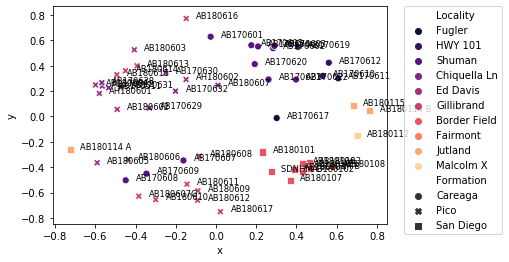

In [14]:
#Plot in reduced ordination space and color code points by Locality 
p1 = sns.scatterplot(x = 'x', y = 'y', data = lookup, hue = 'Locality',
                style = "Formation", s = 50, palette = "magma")

plt.legend(bbox_to_anchor = (1.05,1), loc = 2, borderaxespad = 0)

for line in range(0, lookup.shape[0]):
    p1.text(lookup.x[line]+0.05, lookup.y[line], lookup.index[line], horizontalalignment='left', 
            size = 'small', color = 'black')
    
plt.savefig('NMDS.png', bbox_inches = 'tight', dpi = 100)


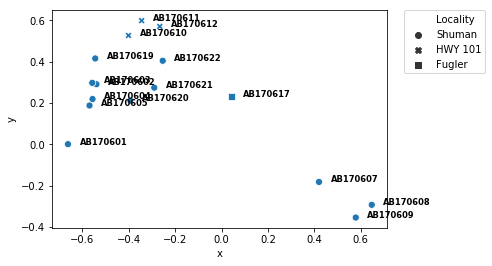

In [53]:
#Plot only Careaga Sandstone samples in reduced ordination space

p3 = sns.scatterplot(x = 'x', y = 'y', style = "Locality", data = careaga, s = 50, palette = 'viridis')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)

for line in range(0, careaga.shape[0]):
    p3.text(careaga.x[line]+0.05, careaga.y[line], careaga.index[line], horizontalalignment='left', 
            size = 'small', color = 'black', weight = 'semibold')

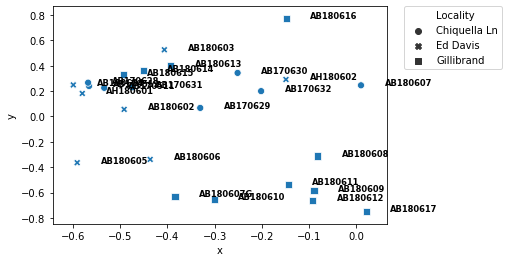

In [36]:
#Plot only Pico Formation samples in reduced ordination space
p8 = sns.scatterplot(x = 'x', y = 'y', data = pico, style = 'Locality', s = 50, palette = 'viridis')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)

for line in range(0, pico.shape[0]):
    p8.text(pico.x[line]+0.05, pico.y[line], pico.index[line], horizontalalignment='left', 
            size = 'small', color = 'black', weight = 'semibold')

IndexError: index out of bounds

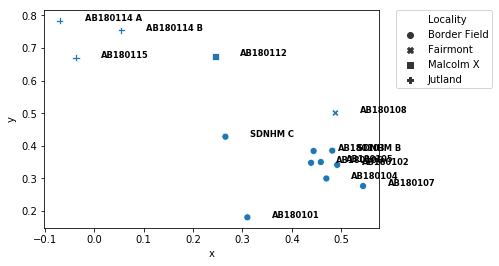

In [54]:
#Plot only San Diego Formation samples in reduced ordination space
p9 = sns.scatterplot(x = 'x', y = 'y', data = sandiego, style = "Locality", s = 50, palette = 'viridis')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)

for line in range(0, pico.shape[0]):
    p9.text(sandiego.x[line]+0.05, sandiego.y[line], sandiego.index[line], horizontalalignment='left', 
            size = 'small', color = 'black', weight = 'semibold')